# 1. KMeans

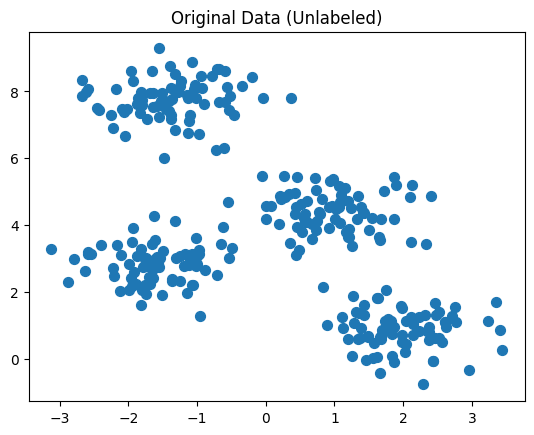

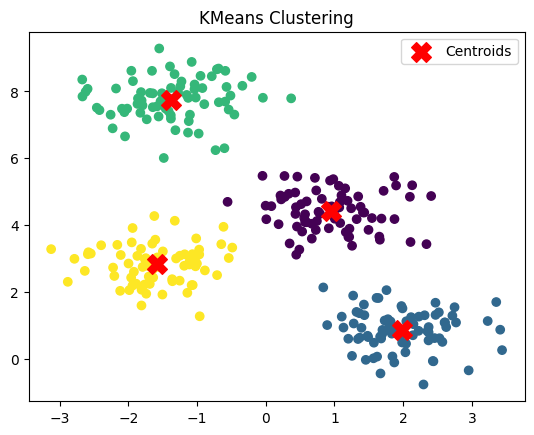

In [1]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

# Synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)

# Visualize data
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Original Data (Unlabeled)")
plt.show()

# Fit KMeans
kmeans = KMeans(n_clusters=4, random_state=0)
y_kmeans = kmeans.fit_predict(X)

# Plot results
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title("KMeans Clustering")
plt.legend()
plt.show()

### Elbow Method: Optimal k (WCSS)

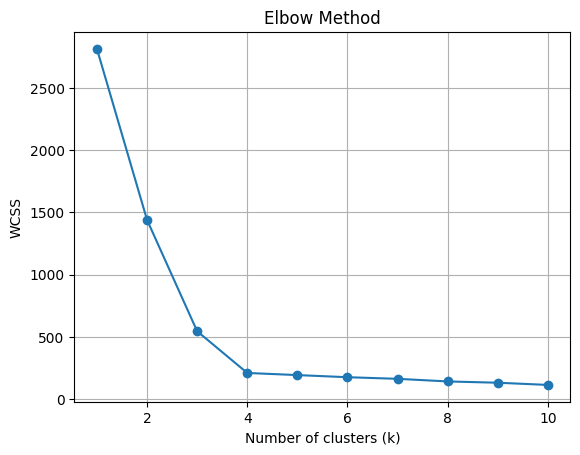

In [2]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)  # inertia = WCSS

plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.grid()
plt.show()

###  Silhouette Score

In [3]:
from sklearn.metrics import silhouette_score

kmeans = KMeans(n_clusters=4, random_state=0)
labels = kmeans.fit_predict(X)
score = silhouette_score(X, labels)
print("Silhouette Score:", score)

Silhouette Score: 0.6819938690643478


#  2. DBSCAN (Density-Based Clustering)

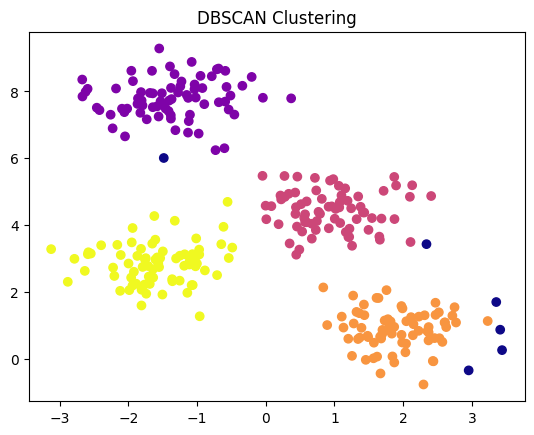

In [ ]:
#Fit & Visualize DBSCAN
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Scale data
X_scaled = StandardScaler().fit_transform(X)

# Fit DBSCAN
db = DBSCAN(eps=0.3, min_samples=5)
labels = db.fit_predict(X_scaled)

# Plot
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='plasma')
plt.title("DBSCAN Clustering")
plt.show()

In [6]:
#Silhouette Score for DBSCAN
# Remove noise points (-1) for score
filtered = labels != -1
if np.any(filtered):
    score = silhouette_score(X_scaled[filtered], labels[filtered])
    print("Silhouette Score (DBSCAN):", score)
else:
    print("No clusters found by DBSCAN.")

Silhouette Score (DBSCAN): 0.665214856907347


#  3. Hierarchical Clustering (Agglomerative)

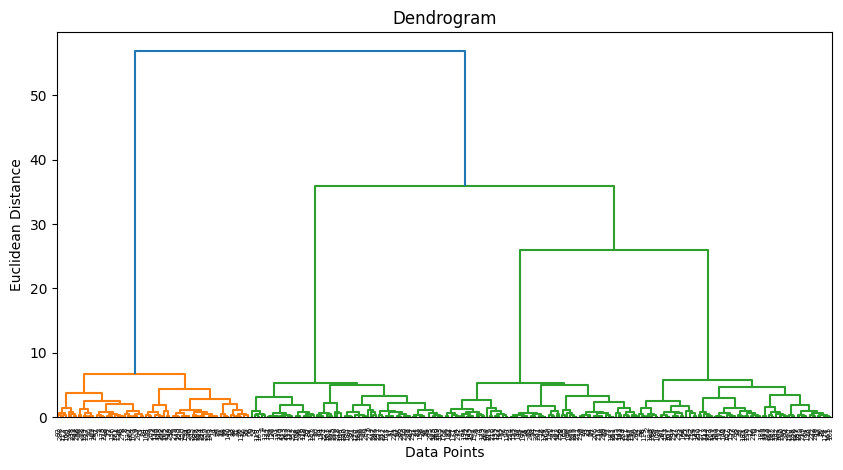

In [7]:
#  Dendrogram to Determine Optimal Clusters
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 5))
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Data Points")
plt.ylabel("Euclidean Distance")
plt.show()

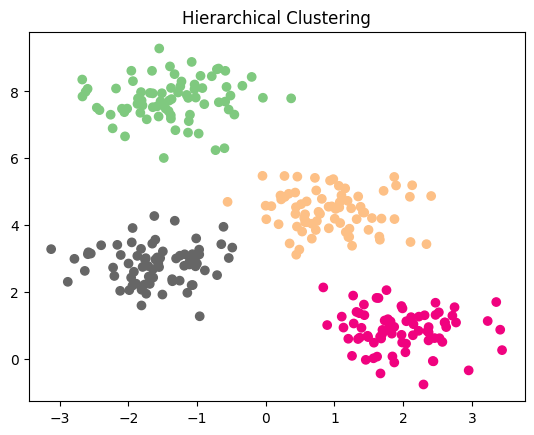

In [9]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
y_hc = hc.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=y_hc, cmap='Accent')
plt.title("Hierarchical Clustering")
plt.show()